In [1]:
#Imports
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados e Compreendendo as Variáveis

In [2]:
#Carregando dados
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Limpeza e Transformação dos Dados


In [4]:
# Verificando valores nulos (ausentes)
df_dsa.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
#Verificando colunas que possuem "?"
df_dsa.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [6]:
# Verificando valores únicos
for col in list(df_dsa.columns):

    # Obtém uma lista de valores únicos
    valores_unicos = df_dsa[col].unique()

    # Se o número de valores exclusivos for menor que 15, imprima os valores.
    # Caso contrário, imprima o número de valores exclusivos
    if len(valores_unicos) < 15:
        print('\n')
        print( col + ': ' + str(len(valores_unicos)) + ' valores únicos')
        print(valores_unicos)
    else:
        print('\n')
        print(col + ': ' + str(len(valores_unicos)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

In [7]:
# Vamos verificar a quantidade e percentual de registros on o valor é igual '?'
for col in df_dsa.columns:
    if df_dsa[col].dtype == object:
        if df_dsa[col][df_dsa[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', df_dsa[col][df_dsa[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(df_dsa[col][df_dsa[col] == '?'].count() / len(df_dsa.index) * 100, 2), '%')


Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 %

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 %

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 %

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 %

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 %

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 %

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 %


In [8]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', df_dsa['gender'][df_dsa['gender'] == 'Unknown/Invalid'].count(), "valores com 'Unknown'")
print('Isso representa', round(df_dsa['gender'][df_dsa['gender'] == 'Unknown/Invalid'].count() / len(df_dsa.index) * 100, 2))


Coluna gender tem 3 valores com 'Unknown'
Isso representa 0.0


#### Agora a parte importante - decidir o que fazer!
* Há valores ausentes sobre peso do paciente em mais de 96% dos registros.
* O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%.
* As demais variáveis apresentam um baixo percentual de valores ausentes.
  
 O que fazer ?

#### Alternativas:
* Colocar a variável peso como categóricas com dois labels: disponível / não disponível (1 e 0).
* Criar um código genérico para a variável payer_code como 99 e preencher os valores ausentes.
* Criar um tipo genérico para a avariável medical speacility como "Sem Especialidade Definida" e preencher os valores ausentes.
* Para a variável gender, o ideal é removê-los, já que são apenas 3 registros.

#### Decisão:
* 1 - Devido à fraca interpretabilidade dos valores ausentes da variável peso, é melhor simplesmente ignorar a variável e removê-la.
* 2 - Vamos descartar as variáveis payer_code e medical_speciality, pois seria difícil tratar quantidade muito grande de valores ausentes.
* 3 - Vamos remover os registros com "?" das demais variáveis.
* 4 - Para a variável gender vamos remover os 3 registros com caregoria "Unknown/Invalid".

In [9]:
df_dsa = df_dsa.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

Para as demais variáveis com baixo percentual de valores ausentes, removemos os registros.

In [10]:
#Removemos os registros com baixo percentual de valores ausentes
df_dsa = df_dsa[df_dsa['race'] != '?']
df_dsa = df_dsa[df_dsa['diag_1'] != '?']
df_dsa = df_dsa[df_dsa['diag_2'] != '?']
df_dsa = df_dsa[df_dsa['diag_3'] != '?']
df_dsa = df_dsa[df_dsa['gender'] != 'Unknown/Invalid']

In [11]:
df_dsa.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [12]:
df_dsa.shape

(98052, 47)

In [13]:
# Checando por variáveis com um único valor (ou seja, constante)
df_dsa.loc[:, df_dsa.nunique() == 1].head()

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No


> Vamos eliminar as colunas que têm apenas 1 valor único, pois elas não adicionam nada à nossa análise. Queremos analsiar variáveis e não constantes.

In [14]:
# Removendo variáveis com valores únicos
df_dsa = df_dsa.loc[:, df_dsa.nunique() != 1]

In [15]:
df_dsa.shape

(98052, 44)

In [16]:
valores_ausentes = (df_dsa.isnull().sum() / len(df_dsa)) * 100 
valores_ausentes[valores_ausentes > 0]

max_glu_serum    94.688533
A1Cresult        83.485294
dtype: float64

In [17]:
df_dsa = df_dsa.drop(['max_glu_serum', 'A1Cresult'], axis = 1)

# Engenharia de Atributos

## Ajustando a Variável Alvo para Estratificação de Risco
Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições aogra são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico.

Nossa variável alvo é 'readmiited', Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:
-- < 30 (readmissão em menos de 30 dias)
-- > 30 (readmissão em mais de 30 dias)
-- No (sem readmissão)

Nós podemos combinar a redmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [18]:
df_dsa['readmitted'].value_counts()

readmitted
NO     52337
>30    34649
<30    11066
Name: count, dtype: int64

In [19]:
#Primeiro, vamos criar uma cópia do dataset até aqui
dados_clean1 = df_dsa.copy()

#Se precisar voltar a este ponto, apenas execute:
#df_dsa = dados_clean1

#Assim não terá que executar todo jupyter notebook até aqui :-)

In [20]:
# Ajustando a variável alvo
# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta

df_dsa['readmitted'] = df_dsa['readmitted'].replace('>30', 1)
df_dsa['readmitted'] = df_dsa['readmitted'].replace('<30', 1)
df_dsa['readmitted'] = df_dsa['readmitted'].replace('NO', 0)

In [21]:
#Verificar a proporção de cada classe
round(df_dsa.readmitted.value_counts() / len(df_dsa) * 100,2)

readmitted
0    53.38
1    46.62
Name: count, dtype: float64

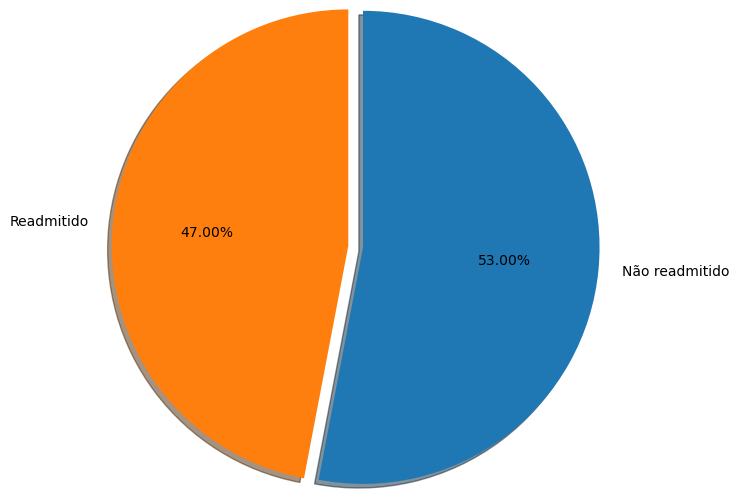

In [22]:
# Vamos visualizar de forma gráfica

# Percentual de cada valor da variável alvo
percentual = round(df_dsa.readmitted.value_counts() / len(df_dsa.index) * 100, 0)

#Labels
labels = ['Não readmitido', 'Readmitido']

#Plot
plt.axis("equal")
plt.pie(percentual,
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

## Recategorização de Variável
Como tratamos a variável idade?

In [23]:
# Tipo de variável
df_dsa.age.dtype

dtype('O')

In [24]:
df_dsa.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

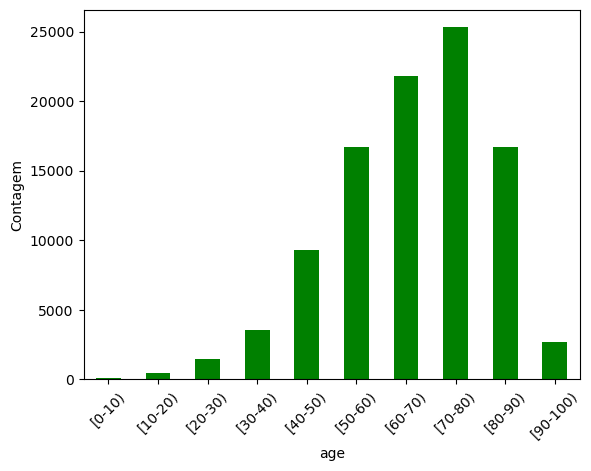

In [25]:
#Plot
#Agrupando os dados por idade e plotando o gráfico de barras
df_dsa.groupby('age').size().plot(kind = 'bar', color = 'green')

plt.ylabel('Contagem')

plt.xticks(rotation = 45)

plt.show()

Podemos perceber que a mioria dos pacientes está na faixa entre 50 e 90 anos.

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente.

Podemos adotar duas abordagens:

1 - Se queremos ver o efeito do aumento da idade na readmissão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria de idade. Por exemplo, se a mtegoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idade em pontos médios, resultando em uma variável numérica.

2 - Podemos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.


Adotaremos a opção 2 pois altera menos a informação contida nos dados.

In [26]:
#Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

#Classificamos como faixa de 0-50 pacientes de até 50 anos
df_dsa['age'] = pd.Series(['[0-50]' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
                           for val in df_dsa['age']], index = df_dsa.index)
#Acima de 80 anos ficam na faixa de 80-100
df_dsa['age'] = pd.Series(['[80-100]' if val in ['[80-90)', '[90-100)'] else val
                           for val in df_dsa['age']], index = df_dsa.index)

In [27]:
df_dsa.age.dtype

dtype('O')

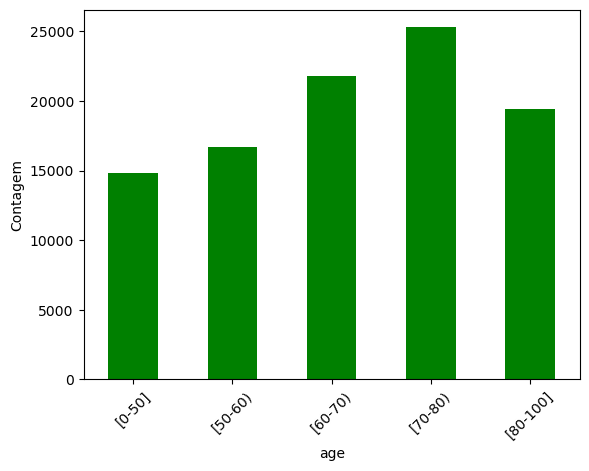

In [28]:
#Plot
#Agrupando os dados por idade e plotando o gráfico de barras
df_dsa.groupby('age').size().plot(kind = 'bar', color = 'green')

plt.ylabel('Contagem')

plt.xticks(rotation = 45)

plt.show()

Como tratamentos variáveis do tipo ID? 

Seguiremos com a Recategorização de Variável.
As variáveis 'admission_type_id', 'charge_disposition_id' e 'admission_source_id' têm valores com significado semelhante. Eles podem ser mesclados para ter menores valores.

#### Variável "admission_type_id"

In [29]:
#Mostra valores únicos
df_dsa.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [30]:
#Mostra o número de valores únicos
df_dsa.admission_type_id.nunique()

8

In [31]:
#A variável 'admission_type_id' contém 8 níveis
#Reduziremos os níveis de 'admission_type_id' para duas categorias
df_dsa['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                         for val in df_dsa['admission_type_id']], index = df_dsa.index)

In [32]:
df_dsa.admission_type_id.nunique()

2

In [33]:
df_dsa.admission_type_id.value_counts()

admission_type_id
Emergencia    52178
Outro         45874
Name: count, dtype: int64

#### Variável "discharge_disposition_id"

In [34]:
df_dsa.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [35]:
df_dsa.discharge_disposition_id.nunique()

26

In [36]:
#A varável "discharge_dispostion_id' contém 26 níveis
#Reduziremos os níveis de "discharge_dispostion_id" para duas categorias
df_dsa['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro'
                                                for val in df_dsa['discharge_disposition_id']], index = df_dsa.index)

In [37]:
df_dsa.discharge_disposition_id.nunique()


2

In [38]:
df_dsa.discharge_disposition_id.value_counts()


discharge_disposition_id
Casa     57609
Outro    40443
Name: count, dtype: int64

#### Variável admission_source_id

In [39]:
df_dsa.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [40]:
df_dsa.admission_source_id.nunique()


17

In [41]:
df_dsa.admission_source_id.value_counts()

admission_source_id
7     55951
1     28355
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [42]:
#A variável 'admission_source_id' contém 17 níveis
# Reduziremos os níveis de 'admission_source_id' para três gategorias
df_dsa['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro'
                                  for val in df_dsa['admission_source_id']], index = df_dsa.index)

In [43]:
df_dsa['admission_source_id'].value_counts()/ len(df_dsa) * 100

admission_source_id
Sala_Emergencia    57.062579
Recomendacao       28.918329
Outro              14.019092
Name: count, dtype: float64

## Engenharia de Atributos com Base no Conhecimento de Domínio
Como tratamos as variáveis 'diag_1', 'diag_2' e 'diag_3' que representam o diagnóstico médico ?

In [44]:
#Visualiza os dados
df_dsa[['diag_1', 'diag_2', 'diag_3']].head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


O conjunto de dados contém até três dianósticos para um determinado paciente (primário, secundário e adicional).


No entanto, cada um deles tem códigos ICD-9 exclusivos e é extremamente difícil incluí-los no modelo e interpretar de forma significativa.


Portanto, reduziremos esses códigos de diagnósticos para 4 categorias considerando a comorbidade.


In [45]:
#Concatena 3 variáveis em um dataframe
diagnostico = df_dsa[['diag_1', 'diag_2', 'diag_3']]

In [46]:
#Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [47]:
#Verifica se há valores ausentes
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

### Calculando a Comorbidade com Engenharia de Atributos

In [48]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-6][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [49]:
%%time
df_dsa['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

CPU times: total: 16.2 s
Wall time: 16.4 s


In [50]:
#Visualiza os dados
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [51]:
#Drop das variáveis individuais
df_dsa.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace = True)

In [52]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_com = pd.crosstab(df_dsa.comorbidade, df_dsa.readmitted, normalize = 'index') * 100

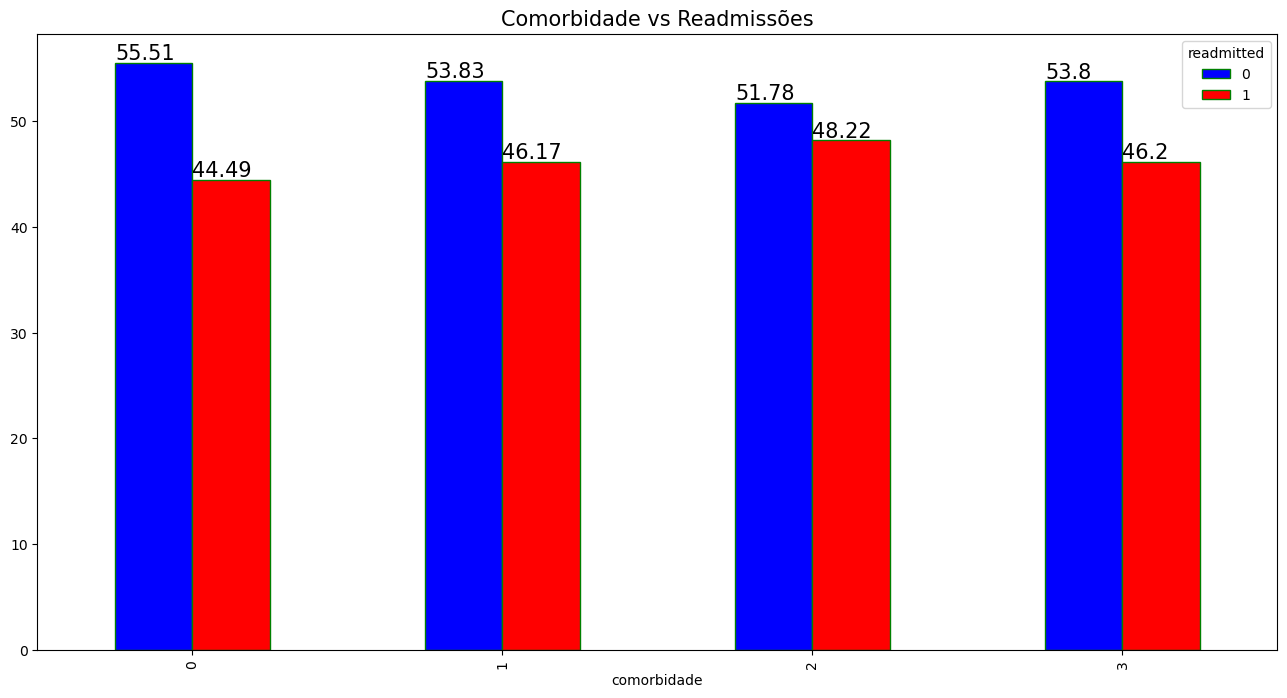

In [53]:
#Plot

#Prepara a figura a partir dos dados
fig = percent_com.plot(kind = 'bar',
                       figsize = (16,8),
                       width = 0.5,
                       edgecolor = 'g',
                       color = ['b', 'r'])
# Desenha cada grupo
for i in fig.patches:
    fig.text(i.get_x() + 0.00,
             i.get_height() + 0.3,
             str(round((i.get_height()), 2)),
    fontsize = 15,
    color = 'black',
    rotation = 0)

#Título e Print
plt.title('Comorbidade vs Readmissões', fontsize = 15)
plt.show()


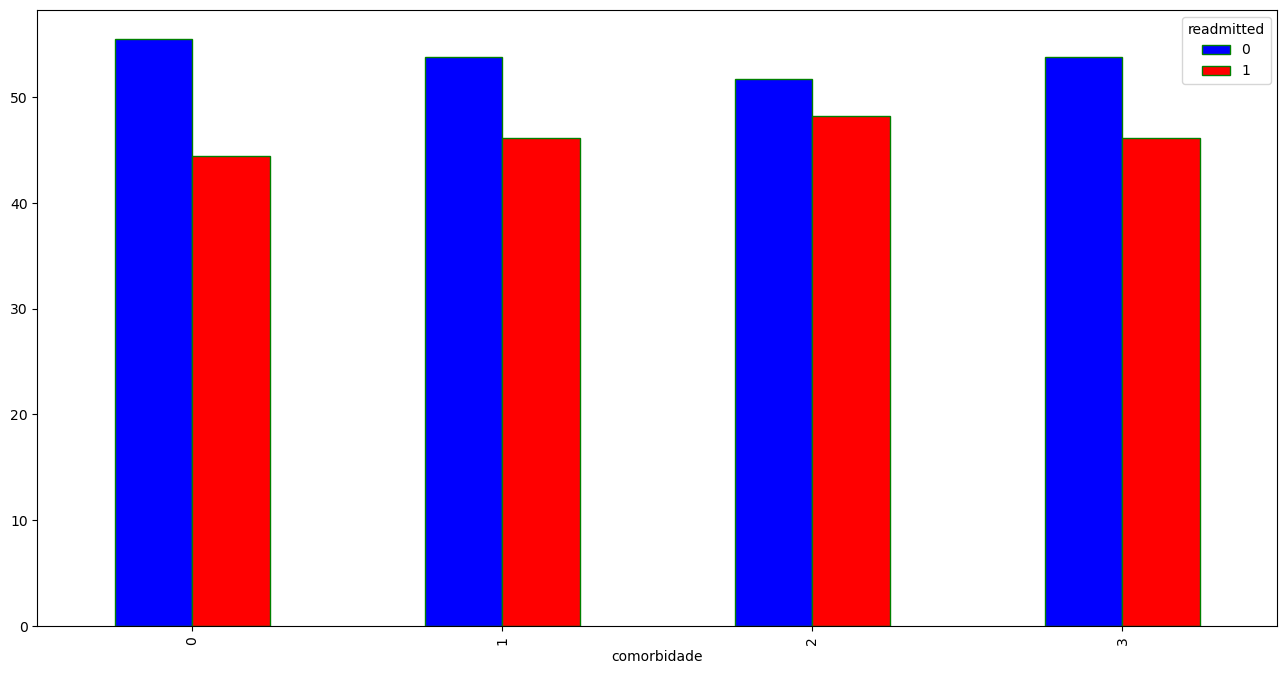

In [54]:
fig = percent_com.plot(kind = 'bar',
                       figsize = (16,8),
                       width = 0.5,
                       edgecolor = 'g',
                       color = ['b', 'r'])

In [55]:
fig.patches

<Axes.ArtistList of 8 patches>

In [56]:
print(fig.patches)

<Axes.ArtistList of 8 patches>


In [57]:
#Debugando o códigop
for i in fig.patches:
    print(i)
    print(fig.text(-0.25,55.80940193845191, 55.51, fontsize = 20, color = 'black', rotation = 0))
    print(i.get_x()+ 0.00)
    print(i.get_height() + 0.3)
    print(round(i.get_height(),2))

Rectangle(xy=(-0.25, 0), width=0.25, height=55.5094, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
-0.25
55.80940193845191
55.51
Rectangle(xy=(0.75, 0), width=0.25, height=53.8312, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
0.75
54.13118327402135
53.83
Rectangle(xy=(1.75, 0), width=0.25, height=51.7823, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
1.75
52.082349837968195
51.78
Rectangle(xy=(2.75, 0), width=0.25, height=53.7992, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
2.75
54.099239033124434
53.8
Rectangle(xy=(0, 0), width=0.25, height=44.4906, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
0.0
44.79059806154808
44.49
Rectangle(xy=(1, 0), width=0.25, height=46.1688, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
1.0
46.46881672597864
46.17
Rectangle(xy=(2, 0), width=0.25, height=48.2177, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
2.0
48.5176501620318
48.22
Rectangle(xy=(3, 0), width=0.25, height=46.2008, angle=0)
Text(-0.25, 55.80940193845191, '55.51')
3.

## Engenharia de Atributos = Recoding de Variáveis Categóricas


##### Variáveis de Dosagem de Medicamento e Agrupamentos de Variáveis


Verificando nosso conjunto de dados até aqui:

In [58]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [59]:
df_dsa.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

O conjunto de dados contém 23 recursos para 23 medicamentos que indicam, para cada um deles, se uma alteração no medicamente foi feita ou não durante a atual internção do paciente.

Vamos plotar algumas variáveis que indicam uso de medicamento.

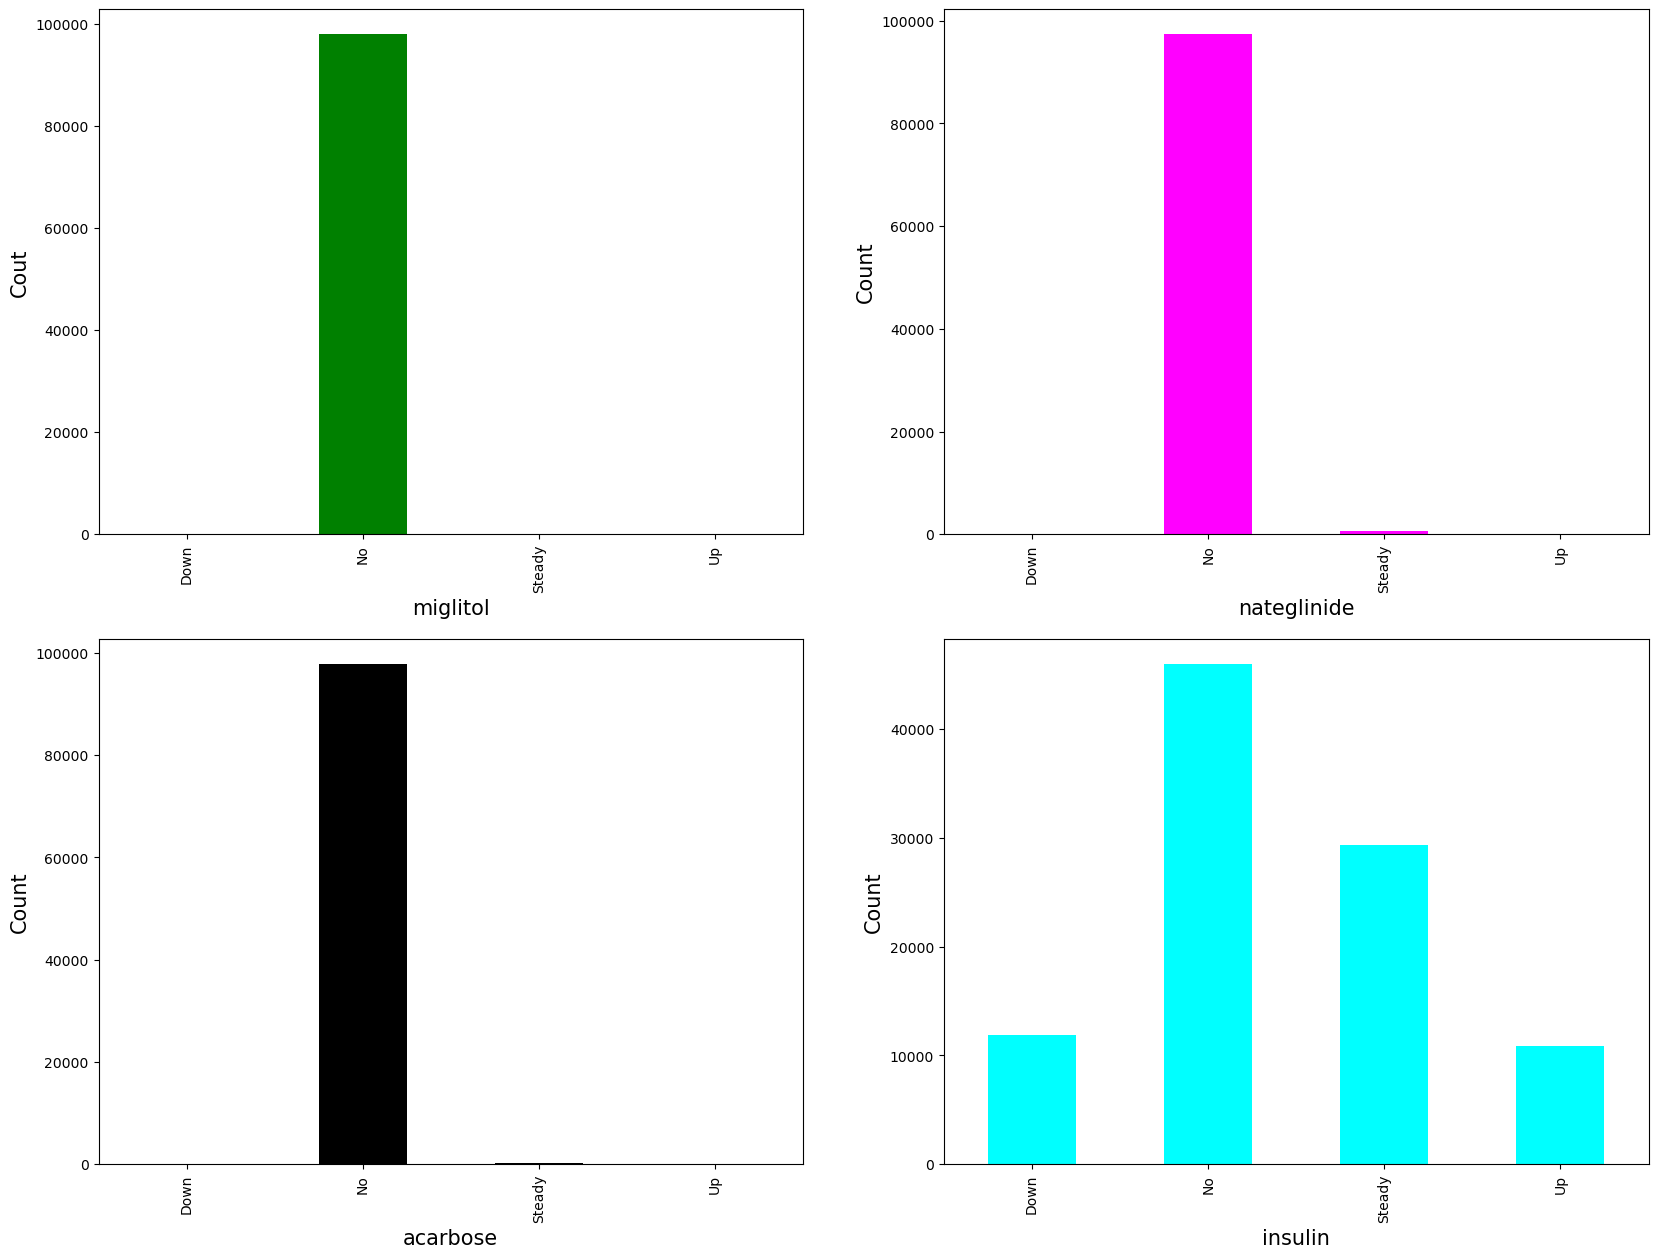

In [60]:
# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = df_dsa.groupby('miglitol').size().plot(kind = 'bar', color = 'green')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Cout', fontsize = 15)


ax2 = fig.add_subplot(222)
ax2 = df_dsa.groupby('nateglinide').size().plot(kind = 'bar', color = 'magenta')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = df_dsa.groupby('acarbose').size().plot(kind = 'bar', color = 'black')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = df_dsa.groupby('insulin').size().plot(kind = 'bar', color = 'cyan')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


In [61]:
df_dsa.groupby('miglitol').size()

miglitol
Down          4
No        98015
Steady       31
Up            2
dtype: int64

Podemos contar quantas alterações do medicamento foram feitas no total para cada paciente e criamos um novo atributo. Isso pod eajudar a descobrir uma relação com o número de alterações, independentemente de qual medicamente foi alterado.

Além disso, podemos criar um novo atributo indicand oo total de medicamentos que cada pacietne consumiu durante a internação. E então avaliamos se há relação do total com a readmissão.


In [62]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [63]:
#Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in df_dsa.columns:
        colname = str(col) + 'temp'
        df_dsa[colname] = df_dsa[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [64]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Cria uma variável para receber a contagem por paciente
df_dsa['num_alt_dosagem_med'] = 0

In [66]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in df_dsa.columns:
        colname = str(col) + 'temp'
        df_dsa['num_alt_dosagem_med'] = df_dsa['num_alt_dosagem_med'] + df_dsa[colname]
        del df_dsa[colname]

In [67]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [68]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in df_dsa.columns:
        df_dsa[col] = df_dsa[col].apply(lambda x: 0 if (x == 'No') else 1)

In [69]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,1,0,0,0,0,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,1,0,0,0,0,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,1,0,0,0,0,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,1,0,0,0,0,No,Yes,1,3,0


Agora, criamos mais uma coluna para refletir quantos medicamentos estão sendo administrados a um paciente.

In [70]:
# Variável com a contagem de medicamentos por paciente
df_dsa['num_med'] = 0

In [71]:
# Carregamos a nova variável
for col in medicamentos:
    if col in df_dsa.columns:
        df_dsa['num_med'] = df_dsa['num_med'] + df_dsa[col]

In [72]:
#Verifica o total de medicamentos
df_dsa['num_med'].value_counts()

num_med
1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: count, dtype: int64

Depois de criar essas duas colunas, podemos remover as colunas dos medicamentos.


In [73]:
# Remove as colunas de medicamentos
df_dsa = df_dsa.drop(columns = medicamentos)

In [75]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,9,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,2,0,1,6,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,7,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,5,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,9,No,Yes,1,3,0,1


#### Recoding de Variáveis Categóricas

Recoding de algumas variáveis categóricas

In [76]:
df_dsa['change'].value_counts()

change
No    52774
Ch    45278
Name: count, dtype: int64

In [77]:
df_dsa['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

In [78]:
df_dsa['diabetesMed'].value_counts()

diabetesMed
Yes    75350
No     22702
Name: count, dtype: int64

In [80]:
df_dsa['change'] = df_dsa['change'].apply(lambda x: 0 if (x == 'No') else 1)
df_dsa['gender'] = df_dsa['gender'].apply(lambda x: 0 if (x == 'Female') else 1)
df_dsa['diabetesMed'] = df_dsa['diabetesMed'].apply(lambda x: 0 if (x == 'No') else 1) 

In [81]:
df_dsa.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50],Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,9,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50],Emergencia,Casa,Sala_Emergencia,2,11,...,2,0,1,6,1,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,7,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50],Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,5,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,9,1,1,1,3,0,1


In [82]:
Alguns pacientes no conjunto de dados tiveram mais de um encontro (consulta).

Não podemos contá-los como encontros independentes, porque isso influencia os resultados para aqueles pacientes que tiveram vários encontros. Assim,
tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, como:

* Considerar a permanência média no hospital em vários encontros.
* Considerar a porcentagem de alterações na medicação em vários encontros.
* Considerar o número total de encontros para substituir o ID exclusivo do encontro.
* Considerar a combinação de diagnóstico em vários encontros como uma lista.

Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente e optamos por manter o primeiro.

SyntaxError: invalid syntax (2127229855.py, line 1)

In [83]:
# Removendo duplicidades por id de paciente, mantendo o primeiro registro
df_dsa = df_dsa.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [84]:
# Salvando o dataset
df_dsa.to_csv('resultado_projeto7.csv', index = False)

In [85]:
%watermark -a 'Mateus Pereira Barboza'

UsageError: Line magic function `%watermark` not found.
